In [4]:
!pip install pytorchvideo

  Using cached termcolor-1.1.0-py3-none-any.whl
  Created wheel for pytorchvideo: filename=pytorchvideo-0.1.5-py3-none-any.whl size=188697 sha256=0e1ed3f8b910c87ccb0a9ee54b4ff0ada9eee3609c0a36a0fd581ad0a7410215
  Stored in directory: c:\users\91730\appdata\local\pip\cache\wheels\84\62\e5\0b41f2deb978f449ba3efb4bb24efd6962e4b6abb1fae544ee
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=21d5c208e8b1bb475a65197ff486505c17e7487e42cd6105735a14d7a7f244da
  Stored in directory: c:\users\91730\appdata\local\pip\cache\wheels\bc\f4\d9\8b3c3f254c28aa2daf5e2f5a8070b0a960278733fd2eb1f7a2
Successfully built pytorchvideo fvcore


In [7]:
#!pip install towhee

In [6]:
'''

import towhee

video_pattern = 'C:/Users/91730/Desktop/Alan K Alex/Nagasaki University internship/Proposed/data/Anomaly-Videos-Part-1/Anomaly-Videos-Part-1/Abuse/Abuse001_x264.mp4'# Replace with your local video directory and video suffix
vectors = towhee.glob['video'](video_pattern) \
                .video_classification.pytorchvideo['video', ('label', 'score', 'vec')](model_name="mvit_base_16x4") \
                .select['vec']() \
                .as_raw() \
                .tensor_normalize() \
                .to_list()
'''


2022-06-26 12:55:46,487 - 24640 - git_utils.py-git_utils:94 - ERROR: video-classification/pytorchvideo repo does not exist.


ValueError: operator video-classification/pytorchvideo not found!

In [10]:
#!pip install towhee torch pytorchvideo

In [11]:
import towhee

video_pattern = 'C:/Users/91730/Desktop/Alan K Alex/Nagasaki University internship/Proposed/data/Anomaly-Videos-Part-1/Anomaly-Videos-Part-1/Abuse/Abuse001_x264.mp4'# Replace with your local video directory and video suffix
vectors = towhee.glob['video'](video_pattern) \
                .video_classification.pytorchvideo['video', ('label', 'score', 'vec')](model_name="mvit_base_16x4") \
                .select['vec']() \
                .as_raw() \
                .tensor_normalize() \
                .to_list()

2022-06-26 13:26:53,597 - 24640 - git_utils.py-git_utils:94 - ERROR: video-classification/pytorchvideo repo does not exist.


ValueError: operator video-classification/pytorchvideo not found!

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from random import randint
import shutil
from sklearn.metrics.pairwise import cosine_similarity
import sys 
from tqdm import tqdm

tqdm.pandas()

In [2]:
img_path = "C:/Users/91730/Desktop/Alan K Alex/Nagasaki University internship/Proposed/data/All Data/All Data"

images = [
        
       f'C:/Users/91730/Desktop/Alan K Alex/Nagasaki University internship/Proposed/data/All Data/All Data/{f}'
    
       for f in os.listdir(img_path)
       if os.path.isfile(os.path.join(img_path,f))
    
    
         ]


image_df = pd.DataFrame(images,columns=['img_path'])

print(image_df)

image_df.head()

                                             img_path
0   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
1   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
2   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
3   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
4   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
5   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
6   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
7   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
8   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
9   C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
10  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
11  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
12  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
13  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
14  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
15  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
16  C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
17  C:/Users/91730/Desktop/A

,img_path
0,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
1,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
2,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
3,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...
4,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...


In [225]:
import statistics

from statistics import mode

def plot_similar(df,embedding_col,query_index,k_neighbors=5):
    
    similarities = cosine_similarity([df[embedding_col][query_index]],df[embedding_col].values.tolist())[0]
    
    
    k = k_neighbors+1
    nearest_indices = np.argpartition(similarities,-k)[-k:]
    
    nearest_indices = nearest_indices[nearest_indices != query_index]
    
    img = Image.open(df['img_path'][query_index]).convert('RGB')
    plt.imshow(img)
    plt.title(f'Query Product.\nIndex: {query_index}')
    
    fig=plt.figure(figsize=(20,4))
    plt.suptitle('Similar Products')
    
    for idx,neighbor in enumerate(nearest_indices):
        
        plt.subplot(1,len(nearest_indices),idx+1)
        img = Image.open(df['img_path'][neighbor]).convert('RGB')
        
        plt.imshow(img)
        plt.title(f'Cosine Sim: {similarities[neighbor]:.3f}')
        #plt.title('f Cluster: {}'.format(df.loc[neighbor,'cluster']))
        
    print("Image = ",mode(df['clust_nam'][nearest_indices]))
       
        
    
    plt.tight_layout()

In [4]:
from pl_bolts.models.self_supervised import SimCLR
import torch

from torch.utils.data import Dataset,DataLoader
from torchvision import io,transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
device

device(type='cpu')

In [21]:
!pip install lightning-bolts

In [6]:
weight_path ='https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'

simclr = SimCLR.load_from_checkpoint(weight_path,strict=False,batch_size=32)


simclr_resnet50 = simclr.encoder.to(device)

simclr_resnet50.eval();


C:\Users\91730\anaconda3\envs\semantic_similarity\lib\site-packages\pytorch_lightning\core\saving.py:217: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['non_linear_evaluator.block_forward.2.weight', 'non_linear_evaluator.block_forward.2.bias']
  rank_zero_warn(


In [7]:
class FashionImageDataset(Dataset):
    
    def __init__(self,df,transform=None):
        self.df=df
        self.transform=transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        #Load the image
        
        img_path = self.df.loc[idx,'img_path']
        image = io.read_image(img_path,mode=io.image.ImageReadMode.RGB)/255
        
        # Apply Transformations
        
        if self.transform:
            
            image = self.transform(image)
            
        return image
    
    
transformations = transforms.Compose([transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225)),transforms.Resize(size=(64,64))])

emb_dataset = FashionImageDataset(df=image_df,transform=transformations)

emb_dataloader = DataLoader(emb_dataset,batch_size=32)

In [8]:

embeddings = []

for batch in tqdm(emb_dataloader):
    
    batch=batch.to(device)
    embeddings+=simclr_resnet50(batch)[0].tolist()
    
image_df['simclr_img_embeddings'] = embeddings
image_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.54s/it]


,img_path,simclr_img_embeddings
0,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.5614607334136963, 0.052999693900346756, 0.7..."
1,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.21465498208999634, 0.0, 0.0, 0.0, 0.0,..."
2,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.08077701926231384, 1.6056780815124512, 0.0,..."
3,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.1776421219110489, 0.7164170742034912, 0.323..."
4,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.1599069982767105, 0.0251874178647995, ..."


Image =  Accident


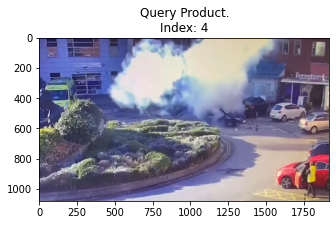

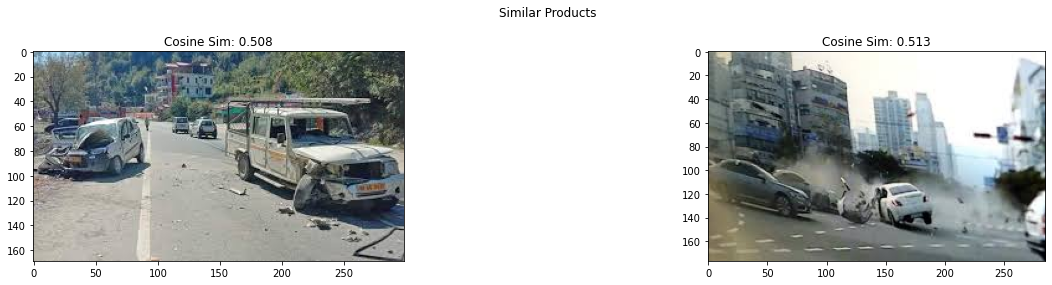

In [255]:
#18

plot_similar(df=image_df,embedding_col='simclr_img_embeddings',query_index=randint(0,len(image_df)-1)
             ,k_neighbors=2)


In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN



In [116]:
image_df.head()

,img_path,simclr_img_embeddings,cluster
0,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.5614607334136963, 0.052999693900346756, 0.7...",0
1,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.21465498208999634, 0.0, 0.0, 0.0, 0.0,...",3
2,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.08077701926231384, 1.6056780815124512, 0.0,...",3
3,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.1776421219110489, 0.7164170742034912, 0.323...",2
4,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.1599069982767105, 0.0251874178647995, ...",2


In [26]:


#db =  DBSCAN(metric="cosine",eps=0.05,min_samples=5)

X=[np.array(ele) for ele in image_df['simclr_img_embeddings'] ]

X= np.array(X)

#db.fit(X)


In [79]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,noise=0.05)

X

array([[ 0.31782278, -0.24922902],
       [-0.49545256,  0.94969516],
       [ 1.94469337,  0.20143092],
       ...,
       [ 0.56077081,  0.74813117],
       [ 0.67456031,  0.69439246],
       [ 0.10349491, -0.1112446 ]])

In [92]:
y_pred = db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [41]:

from sklearn.cluster import KMeans

km = KMeans(n_clusters=6,random_state=42).fit_predict(X)

In [42]:
km

array([1, 5, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 2, 4, 1, 1,
       4, 2, 4, 1, 5, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [43]:
image_df['cluster']=km

## Cosine distance matrix

In [10]:
from scipy import spatial

In [11]:

cos_d = []

for i in range(len(image_df)):
    row_d=[]
    for j in range(len(image_df)):
        dataset1=image_df['simclr_img_embeddings'][i]
        dataset2=image_df['simclr_img_embeddings'][j]
        val = 1 - spatial.distance.cosine(dataset1, dataset2)
        row_d.append(val)
    
    cos_d.append(row_d)
    
cos_d

[[1,
  0.23938884755665824,
  0.29788504335648014,
  0.374319052873757,
  0.34669922051569735,
  0.2550138252838492,
  0.38245323582624746,
  0.37027961427209544,
  0.2545431793662849,
  0.4096663516832587,
  0.31242329811662306,
  0.3347607117802065,
  0.41558222088265717,
  0.25673600113492534,
  0.2791944266524412,
  0.23404332495184854,
  0.389790975053079,
  0.32237480344978886,
  0.32777063175776644,
  0.2691940887650599,
  0.30450060063791295,
  0.3149062193314095,
  0.3401837684117679,
  0.335646616799537,
  0.299673367974163,
  0.2627042666268947,
  0.2267397147643978,
  0.2871695122825133,
  0.3986576994684865,
  0.5225924287384194,
  0.2672561560576976,
  0.3517603717061094,
  0.2983375245670369,
  0.4002348091509498,
  0.4063370399627627,
  0.36341317397109973,
  0.37562261331388735,
  0.289820649883325,
  0.3772488565474006,
  0.26592029648754956],
 [0.23938884755665824,
  1,
  0.7579342999609087,
  0.32675590433790047,
  0.28282165142837856,
  0.17642441766967387,
  0.392

In [134]:
image_df['simclr_img_embeddings'][0]


[0.5614607334136963,
 0.052999693900346756,
 0.7633517980575562,
 0.0,
 0.0,
 0.06602683663368225,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0006156116724014282,
 0.0,
 0.0,
 0.0,
 0.006802976131439209,
 0.09548158943653107,
 0.031284838914871216,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7385250329971313,
 0.006211593747138977,
 0.0,
 0.0,
 0.0,
 0.058632999658584595,
 0.0,
 1.3053438663482666,
 0.7411020994186401,
 0.0,
 0.07934711128473282,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2382352352142334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4778646230697632,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1252414584159851,
 0.0,
 0.0,
 0.0,
 0.13962092995643616,
 0.0,
 0.1445043683052063,
 0.0,
 0.0,
 0.0,
 0.3151744306087494,
 0.300823450088501,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.26718801259994507,
 0.9604322910308838,
 0.0,
 0.002961583435535431,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5313259959220886,
 0.030473865568637848,
 0.04242628812789917,
 0.0,
 0.0,
 0.0,
 0.703346

In [ ]:
#similarities = cosine_similarity([df[embedding_col][query_index]],df[embedding_col].values.tolist())[0]

In [195]:
import numpy as np
from sklearn.cluster import SpectralClustering
mat = np.array(cos_d)
cluster_pred = SpectralClustering(n_clusters=7,affinity="precomputed",random_state=42).fit_predict(mat)

In [145]:
from scipy import spatial

dataSetI = [3, 45, 7, 2]
dataSetII = [2, 54, 13, 15]
result = 1 - spatial.distance.cosine(dataSetI, dataSetII)

result


0.97228425171235

In [197]:
image_df['cluster']=cluster_pred

In [196]:
cluster_pred

array([2, 0, 0, 1, 6, 3, 1, 1, 4, 3, 2, 2, 4, 4, 2, 3, 2, 4, 4, 6, 1, 6,
       6, 4, 6, 6, 0, 6, 1, 1, 3, 1, 6, 1, 2, 2, 4, 5, 1, 5])

In [154]:
from sklearn.cluster import DBSCAN

mat=np.array(cos_d)
pred=DBSCAN(eps=0.88).fit_predict(mat)

pred


array([-1, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  0,  1,  1, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [144]:
image_df['cluster']=pred

In [46]:

from sklearn.cluster import KMeans

eigen_values, eigen_vectors = np.linalg.eigh(mat)
k_pred = KMeans(n_clusters=6, init='k-means++',random_state=42).fit_predict(eigen_vectors[:, 2:4])

k_pred

array([1, 2, 1, 3, 2, 1, 2, 3, 3, 3, 1, 2, 1, 1, 3, 3, 1, 3, 5, 2, 5, 3,
       4, 0, 5, 1, 4, 4, 4, 3, 1, 3, 4, 3, 4, 1, 1, 1, 3, 1])

In [89]:
image_df

,img_path,simclr_img_embeddings,cluster
0,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.5614607334136963, 0.052999693900346756, 0.7...",0
1,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.21465498208999634, 0.0, 0.0, 0.0, 0.0,...",4
2,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.08077701926231384, 1.6056780815124512, 0.0,...",4
3,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.1776421219110489, 0.7164170742034912, 0.323...",1
4,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.1599069982767105, 0.0251874178647995, ...",5
5,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.9771378040313721, 0.0, 0.0, 0.0, 0.160...",6
6,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.01673784852027893, 0.2922773063182831,...",0
7,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.8599452376365662, 0.0, 0.0661796107888...",1
8,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.0, 0.0, 0.0, 0.5811726450920105, 0.0, ...",3
9,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.7019583582878113, 0.0, 0.0, 0.0, 0.174...",6


In [199]:
def plot(val):
    
    cnt = 1
    
    for i in range(len(image_df)):
        if(image_df['cluster'][i]==val and cnt<=8):
            
            plt.subplot(1,9,cnt+1)
            cnt=cnt+1
            img = Image.open(image_df['img_path'][i],).convert('RGB')
            
        
            #plt.rcParams["figure.figsize"] = (20,3)
            plt.imshow(img)
            #plt.title(f'Cosine Sim: {similarities[neighbor]:.3f}')
            #plt.title('f Cluster: {}'.format(df.loc[neighbor,'cluster']))


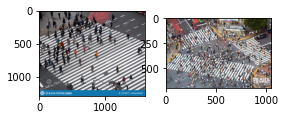

In [211]:
plot(5)

In [237]:

def assign_names():
    
    image_df['clust_nam']=" "
    
    for i in range(len(image_df)):
        if(image_df['cluster'][i]==0 or image_df['cluster'][i]==2):
            image_df['clust_nam'][i]="Abuse"
        elif(image_df['cluster'][i]==1):
            image_df['clust_nam'][i]="Burglary"
        
        elif(image_df['cluster'][i]==3):
            image_df['clust_nam'][i]="Night"
        
        elif(image_df['cluster'][i]==4):
            image_df['clust_nam'][i]="Normal"
            
        elif(image_df['cluster'][i]==5):
            image_df['clust_nam'][i]="Crowd"
            
        elif(image_df['cluster'][i]==6):
            image_df['clust_nam'][i]="Accident"
            

            
            


In [238]:
assign_names()

C:\Users\91730\AppData\Local\Temp\ipykernel_2312\2341394702.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df['clust_nam'][i]="Abuse"
C:\Users\91730\AppData\Local\Temp\ipykernel_2312\2341394702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df['clust_nam'][i]="Burglary"
C:\Users\91730\AppData\Local\Temp\ipykernel_2312\2341394702.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_df['clust_nam'][i]="Acciden

In [239]:
image_df.head()

,img_path,simclr_img_embeddings,cluster,clust_nam
0,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.5614607334136963, 0.052999693900346756, 0.7...",2,Abuse
1,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.21465498208999634, 0.0, 0.0, 0.0, 0.0,...",0,Abuse
2,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.08077701926231384, 1.6056780815124512, 0.0,...",0,Abuse
3,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.1776421219110489, 0.7164170742034912, 0.323...",1,Burglary
4,C:/Users/91730/Desktop/Alan K Alex/Nagasaki Un...,"[0.0, 0.1599069982767105, 0.0251874178647995, ...",6,Accident
